In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/TimeSeries/Retail_Gold/gold_historical_data.csv'

import pandas as pd

# Load CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check the first few rows
df.head()

Mounted at /content/drive


,Date,Adj Close,Close,High,Low,Open,Volume
0,2016-02-05,1157.800049,1157.800049,1174.800049,1146.000000,1155.599976,877
1,2016-02-08,1197.900024,1197.900024,1200.400024,1165.000000,1173.500000,931
2,2016-02-09,1198.699951,1198.699951,1199.199951,1186.699951,1188.699951,700
3,2016-02-10,1194.699951,1194.699951,1197.699951,1182.099976,1189.800049,671
4,2016-02-11,1247.900024,1247.900024,1260.800049,1204.599976,1205.599976,995


In [2]:
len(df)

2510

In [3]:
# Parse date
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

# Set date as index and sort
df = df.set_index('Date').sort_index()

In [4]:
# Basic date parts
df['day_of_week'] = df.index.dayofweek        # 0=Mon, 6=Sun
df['day_of_month'] = df.index.day
df['week_of_year'] = df.index.isocalendar().week.astype(int)
df['month'] = df.index.month

# Weekend flag
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [5]:
import numpy as np

# Day of week (7)
df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# Day of month (31)
df['dom_sin'] = np.sin(2 * np.pi * df['day_of_month'] / 31)
df['dom_cos'] = np.cos(2 * np.pi * df['day_of_month'] / 31)

# Month (12)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Week of year (52)
df['woy_sin'] = np.sin(2 * np.pi * df['week_of_year'] / 52)
df['woy_cos'] = np.cos(2 * np.pi * df['week_of_year'] / 52)

In [6]:
# Log-return of Adjusted Close
df['log_return_10d'] = np.log(df['Adj Close'].shift(-10) / df['Adj Close'])

# Lagged log-return (previous day return)
df['log_return_10d_lag_1'] = df['log_return_10d'].shift(1)

In [7]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,day_of_week,day_of_month,week_of_year,month,...,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos,woy_sin,woy_cos,log_return_10d,log_return_10d_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-05,1157.800049,1157.800049,1174.800049,1146.000000,1155.599976,877,4,5,5,2,...,-0.433884,-0.900969,0.848644,0.528964,0.866025,0.5,0.568065,0.822984,0.043685,NaN
2016-02-08,1197.900024,1197.900024,1200.400024,1165.000000,1173.500000,931,0,8,6,2,...,0.000000,1.000000,0.998717,-0.050649,0.866025,0.5,0.663123,0.748511,0.020164,0.043685
2016-02-09,1198.699951,1198.699951,1199.199951,1186.699951,1188.699951,700,1,9,6,2,...,0.781831,0.623490,0.968077,-0.250653,0.866025,0.5,0.663123,0.748511,0.032825,0.020164
2016-02-10,1194.699951,1194.699951,1197.699951,1182.099976,1189.800049,671,2,10,6,2,...,0.974928,-0.222521,0.897805,-0.440394,0.866025,0.5,0.663123,0.748511,0.035764,0.032825
2016-02-11,1247.900024,1247.900024,1260.800049,1204.599976,1205.599976,995,3,11,6,2,...,0.433884,-0.900969,0.790776,-0.612106,0.866025,0.5,0.663123,0.748511,-0.022775,0.035764


In [8]:
# Handle missing values from lagging
# Lag features introduce NaNs at the beginning.

df = df.dropna()

In [9]:
# drop columns which can cause misunderstanding for LSTM model
df = df.drop(
    columns=[
        'day_of_week',
        'day_of_month',
        'month',
        'week_of_year'
    ]
)

In [10]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,is_weekend,dow_sin,dow_cos,dom_sin,dom_cos,month_sin,month_cos,woy_sin,woy_cos,log_return_10d,log_return_10d_lag_1
Date,,,,,,,,,,,,,,,,,
2016-02-08,1197.900024,1197.900024,1200.400024,1165.000000,1173.500000,931,0,0.000000,1.000000,0.998717,-0.050649,0.866025,0.5,0.663123,0.748511,0.020164,0.043685
2016-02-09,1198.699951,1198.699951,1199.199951,1186.699951,1188.699951,700,0,0.781831,0.623490,0.968077,-0.250653,0.866025,0.5,0.663123,0.748511,0.032825,0.020164
2016-02-10,1194.699951,1194.699951,1197.699951,1182.099976,1189.800049,671,0,0.974928,-0.222521,0.897805,-0.440394,0.866025,0.5,0.663123,0.748511,0.035764,0.032825
2016-02-11,1247.900024,1247.900024,1260.800049,1204.599976,1205.599976,995,0,0.433884,-0.900969,0.790776,-0.612106,0.866025,0.5,0.663123,0.748511,-0.022775,0.035764
2016-02-12,1239.099976,1239.099976,1247.800049,1233.500000,1247.800049,250,0,-0.433884,-0.900969,0.651372,-0.758758,0.866025,0.5,0.663123,0.748511,-0.004205,-0.022775


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2499 entries, 2016-02-08 to 2026-01-15
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Adj Close             2499 non-null   float64
 1   Close                 2499 non-null   float64
 2   High                  2499 non-null   float64
 3   Low                   2499 non-null   float64
 4   Open                  2499 non-null   float64
 5   Volume                2499 non-null   int64  
 6   is_weekend            2499 non-null   int64  
 7   dow_sin               2499 non-null   float64
 8   dow_cos               2499 non-null   float64
 9   dom_sin               2499 non-null   float64
 10  dom_cos               2499 non-null   float64
 11  month_sin             2499 non-null   float64
 12  month_cos             2499 non-null   float64
 13  woy_sin               2499 non-null   float64
 14  woy_cos               2499 non-null   float64
 15  log

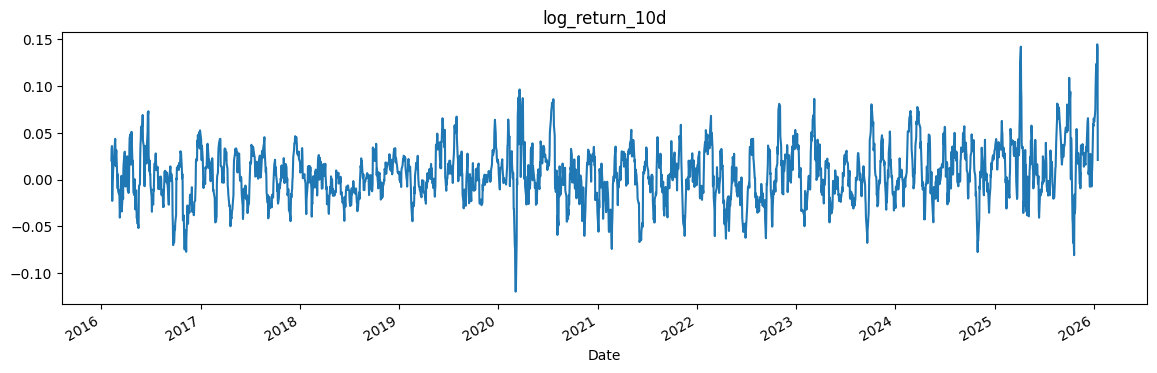

In [12]:
import matplotlib.pyplot as plt

df['log_return_10d'].plot(figsize=(14,4), title='log_return_10d')
plt.show()

In [13]:
# check missing
print("Any nulls?", df.isnull().any().any())

Any nulls? False


In [14]:
# Total number of observations
n = len(df)

# Indices for splits
train_end = int(n * 0.60)
val_end = int(n * 0.80)

# Split the data
df_train = df.iloc[:train_end]
df_val   = df.iloc[train_end:val_end]
df_test  = df.iloc[val_end:]

# Sanity checks
print("Train:", df_train.shape)
print("Validation:", df_val.shape)
print("Test:", df_test.shape)

Train: (1499, 17)
Validation: (500, 17)
Test: (500, 17)


In [15]:
# Target variable (log-returns)
target = 'log_return_10d'

# Categorical features
categorical_features = [
    'is_weekend'
]

# Numerical features
numerical_features = [
    # Market variables
    'Volume',
    'Open',
    'Close',
    'Low',
    'High',


    # Cyclical encodings
    'dow_sin',
    'dow_cos',
    'dom_sin',
    'dom_cos',
    'month_sin',
    'month_cos',
    'woy_sin',
    'woy_cos',

    # Lagged log-return
    'log_return_10d_lag_1'
]

In [16]:
# Split features and target
X_train = df_train[categorical_features + numerical_features]
y_train = df_train[target]

X_val = df_val[categorical_features + numerical_features]
y_val = df_val[target]

X_test = df_test[categorical_features + numerical_features]
y_test = df_test[target]

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Feature preprocessor (X)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Fit ONLY on training features
X_train_processed = preprocessor.fit_transform(X_train)

# Transform validation and test features
X_val_processed  = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("X train shape:", X_train_processed.shape)
print("X val shape:", X_val_processed.shape)
print("X test shape:", X_test_processed.shape)



# Target scaler
y_scaler = StandardScaler()

# Fit ONLY on training target
y_train_processed = y_scaler.fit_transform(
    y_train.values.reshape(-1, 1)
)

# Transform validation and test target
y_val_processed = y_scaler.transform(
    y_val.values.reshape(-1, 1)
)

y_test_processed = y_scaler.transform(
    y_test.values.reshape(-1, 1)
)

print("y train shape:", y_train_processed.shape)
print("y val shape:", y_val_processed.shape)
print("y test shape:", y_test_processed.shape)

X train shape: (1499, 15)
X val shape: (500, 15)
X test shape: (500, 15)
y train shape: (1499, 1)
y val shape: (500, 1)
y test shape: (500, 1)


In [18]:
import numpy as np

def create_sliding_windows(X, y, window_size):
    X_windows = []
    y_windows = []

    for i in range(len(X) - window_size):
        X_windows.append(X[i:i + window_size])
        y_windows.append(y[i + window_size, 0])

    return np.array(X_windows), np.array(y_windows)


window_size = 30

X_train_win, y_train_win = create_sliding_windows(
    X_train_processed, y_train_processed, window_size
)

X_val_win, y_val_win = create_sliding_windows(
    X_val_processed, y_val_processed, window_size
)

X_test_win, y_test_win = create_sliding_windows(
    X_test_processed, y_test_processed, window_size
)

print("Train windows:", X_train_win.shape, y_train_win.shape)
print("Val windows:", X_val_win.shape, y_val_win.shape)
print("Test windows:", X_test_win.shape, y_test_win.shape)

Train windows: (1469, 30, 15) (1469,)
Val windows: (470, 30, 15) (470,)
Test windows: (470, 30, 15) (470,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,033 (211.07 KB)

 Trainable params: 54,033 (211.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.9257 - mae: 0.7264 - val_loss: 0.9245 - val_mae: 0.7698
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.6764 - mae: 0.6294 - val_loss: 0.7715 - val_mae: 0.6928
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.5638 - mae: 0.5822 - val_loss: 0.7636 - val_mae: 0.7043
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.4555 - mae: 0.5269 - val_loss: 0.7174 - val_mae: 0.6656
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.4161 - mae: 0.4921 - val_loss: 0.7157 - val_mae: 0.6829
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.4208 - mae: 0.5048 - val_loss: 0.8231 - val_mae: 0.7365
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3253 - mae: 0.4400 - val_loss: 0.6618 - val_mae: 0.6413
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3359 - mae: 0.4534 - val_loss: 0.8838 - val_mae: 0.7683
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - lo

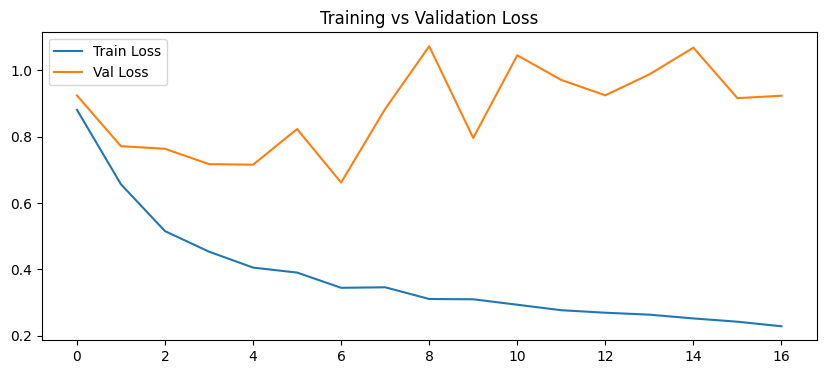

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def build_lstm_model(
    input_shape,
    lstm_units_1=64,
    lstm_units_2=64,
    dense_units=8,
    dropout_rate=0.2,
    learning_rate=0.001
):
    model = Sequential()

    model.add(
        LSTM(
            lstm_units_1,
            return_sequences=True,
            input_shape=input_shape
        )
    )

    model.add(LSTM(lstm_units_2))
    model.add(Dropout(dropout_rate))

    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=['mae']
    )

    return model



input_shape = (X_train_win.shape[1], X_train_win.shape[2])

model = build_lstm_model(input_shape)
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(
    X_train_win,
    y_train_win,
    validation_data=(X_val_win, y_val_win),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


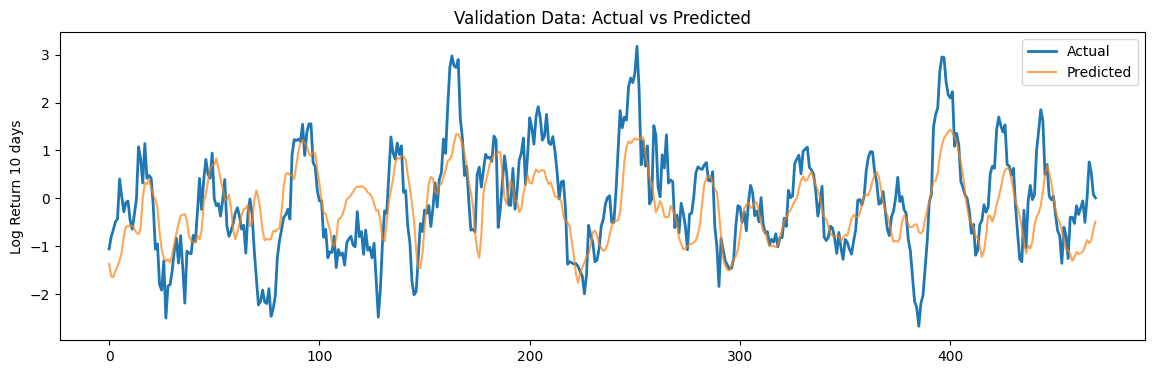

In [23]:
import numpy as np

# Predict on validation data
y_val_pred = model.predict(X_val_win).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(y_val_win, label='Actual', linewidth=2)
plt.plot(y_val_pred, label='Predicted', alpha=0.7)
plt.title('Validation Data: Actual vs Predicted')
plt.ylabel('Log Return 10 days')
plt.legend()
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


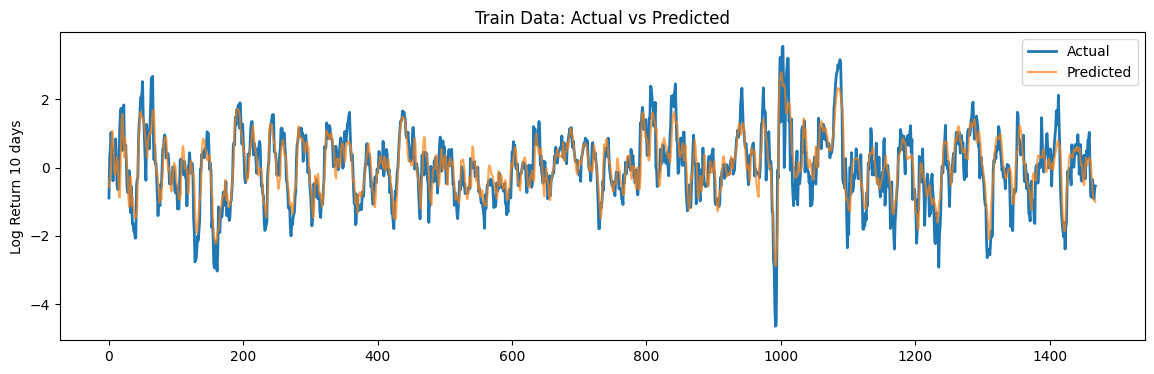

In [24]:
import numpy as np

# Predict on train data
y_train_pred = model.predict(X_train_win).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(y_train_win, label='Actual', linewidth=2)
plt.plot(y_train_pred, label='Predicted', alpha=0.7)
plt.title('Train Data: Actual vs Predicted')
plt.ylabel('Log Return 10 days')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


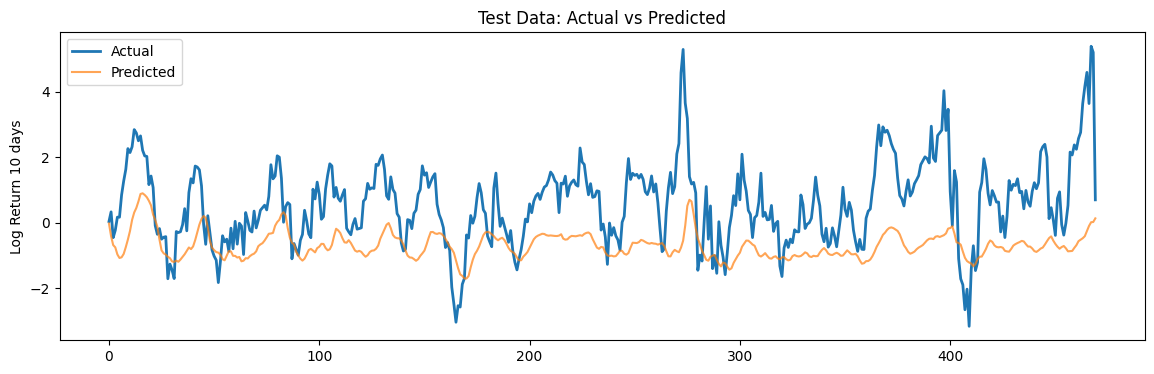

In [25]:
import numpy as np

# Predict on test data
y_test_pred = model.predict(X_test_win).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.plot(y_test_win, label='Actual', linewidth=2)
plt.plot(y_test_pred, label='Predicted', alpha=0.7)
plt.title('Test Data: Actual vs Predicted')
plt.ylabel('Log Return 10 days')
plt.legend()
plt.show()

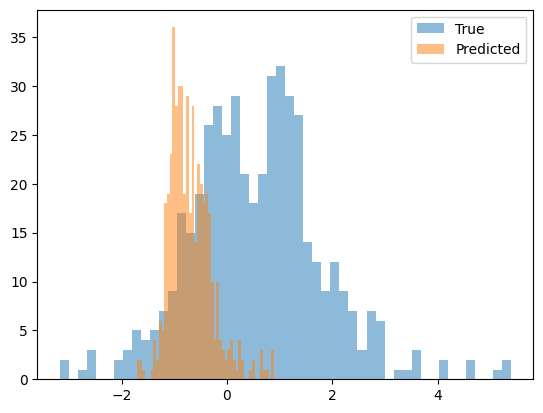

In [26]:
plt.hist(y_test_win, bins=50, alpha=0.5, label='True')
plt.hist(y_test_pred, bins=50, alpha=0.5, label='Predicted')
plt.legend()